In [1]:
!pip install biopython seaborn matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 36.0 MB/s eta 0:00:00


In [2]:
#fetch the gene data directly from NCBI(lac Z)
from Bio import Entrez, SeqIO

# Always put your email
Entrez.email = "kushinirmal0987@gmail.com"

# Fetch lacZ gene (Gene ID: 945006)
handle = Entrez.efetch(db="nuccore", id="U00096.3", rettype="gb", retmode="text")
record = SeqIO.read(handle, "genbank")
handle.close()

# Extract gene by name
gene_name = "lacZ"
lacZ_seq = ""

for feature in record.features:
    if feature.type == "gene" and "gene" in feature.qualifiers:
        if feature.qualifiers["gene"][0] == gene_name:
            start = feature.location.start
            end = feature.location.end
            lacZ_seq = record.seq[start:end]

print("First 200 bases of lacZ:")
print(lacZ_seq[:200])
print("\nLength:", len(lacZ_seq))


First 200 bases of lacZ:
TTATTTTTGACACCAGACCAACTGGTAATGGTAGCGACCGGCGCTCAGCTGGAATTCCGCCGATACTGACGGGCTCCAGGAGTCGTCGCCACCAATCCCCATATGGAAACCGTCGATATTCAGCCATGTGCCTTCTTCCGCGTGCAGCAGATGGCGATGGCTGGTTTCCATCAGTTGCTGTTGACTGTAGCGGCTGATGT

Length: 3075


In [4]:
#calculate gc content
from Bio.SeqUtils import gc_fraction

gc = gc_fraction(lacZ_seq) * 100
print("GC Content of lacZ gene:", gc)


GC Content of lacZ gene: 56.26016260162602


In [5]:
#codon usage table
from collections import Counter

codons = [str(lacZ_seq[i:i+3]) for i in range(0, len(lacZ_seq), 3)]
codon_count = Counter(codons)

for codon, count in codon_count.items():
    print(codon, "→", count)


TTA → 1
TTT → 15
TTG → 15
ACA → 5
CCA → 39
GAC → 19
CAA → 11
CTG → 43
GTA → 18
ATG → 19
GCG → 37
ACC → 24
GGC → 28
GCT → 25
CAG → 54
GAA → 19
TTC → 47
CGC → 28
CGA → 9
TAC → 9
TGA → 8
CGG → 36
GGA → 6
GTC → 22
GCC → 34
AAT → 22
CCC → 9
CAT → 24
GAT → 17
ATT → 17
TGT → 8
GTG → 15
GGT → 24
ACT → 9
GTT → 30
TGG → 6
ATA → 13
CGT → 20
GCA → 11
ATC → 42
AAA → 19
AGT → 4
AAG → 9
GGG → 9
TAA → 7
TCC → 4
GAG → 9
CCG → 7
CTC → 15
TGC → 12
CAC → 24
AAC → 12
AGC → 9
CTT → 5
AGG → 11
ACG → 19
TAG → 6
AGA → 3
TCG → 3


In [6]:
#translate the gene
protein = lacZ_seq.translate()
print(protein[:200])
print("Protein length:", len(protein))


LFLTPDQLVMVATGAQLEFRRY*RAPGVVATNPHMETVDIQPCAFFRVQQMAMAGFHQLLLTVAADVELEVAAPLVWAIIQFARPAAQTVFAREDVRGIHV*QWQIPAVKTGGSKAVGIVFLRP*SEPVYPLCYLRQLAVQANPRRMRCIARHFNINGNRHLTTTINPVGFPADK*GFPLMLPRVSGRNQHRISKCICRA
Protein length: 1025


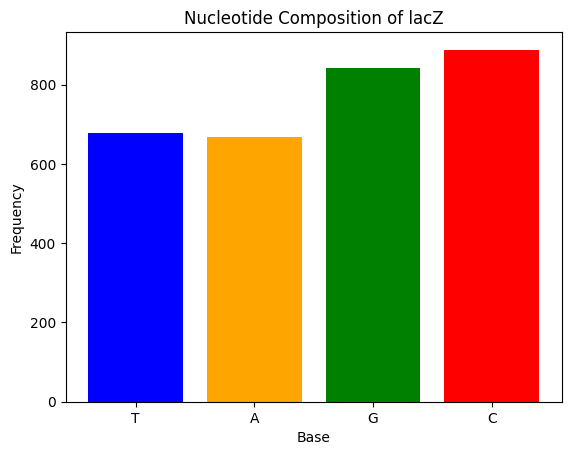

In [7]:
#visualizing nucleotide composistion
import matplotlib.pyplot as plt
from collections import Counter

counts = Counter(str(lacZ_seq))

plt.bar(counts.keys(), counts.values(), color=["blue","orange","green","red"])
plt.title("Nucleotide Composition of lacZ")
plt.xlabel("Base")
plt.ylabel("Frequency")
plt.show()


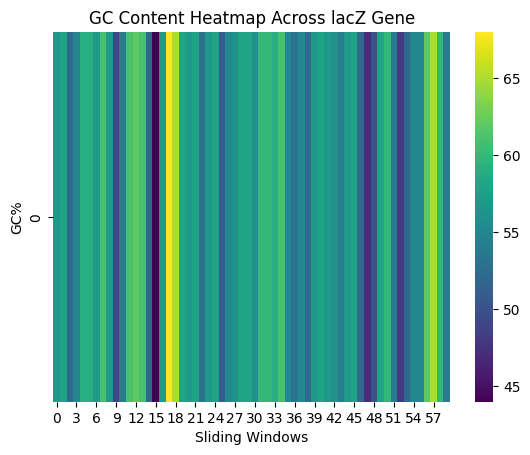

In [10]:
#gc heatmap along the gene
from Bio.SeqUtils import gc_fraction
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

window = 100
gc_values = []

for i in range(0, len(lacZ_seq)-window, 50):
    sub = lacZ_seq[i:i+window]
    gc_values.append(gc_fraction(sub) * 100)   # Convert to percentage

sns.heatmap(np.array([gc_values]), cmap="viridis", cbar=True)
plt.title("GC Content Heatmap Across lacZ Gene")
plt.xlabel("Sliding Windows")
plt.ylabel("GC%")
plt.show()


In [9]:
with open("lacZ_results.txt","w") as f:
    f.write(f"Gene: lacZ\nLength: {len(lacZ_seq)}\nGC: {gc}\n\nCodon Counts:\n")
    for codon, count in codon_count.items():
        f.write(f"{codon}: {count}\n")


In [11]:
from google.colab import files
files.download("lacZ_results.txt")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

🔬 Sequence Retrieval • GC Content • Codon Usage • Visualizations

In this project, I explored the lacZ gene from Escherichia coli by directly retrieving the sequence from NCBI GenBank using Biopython.
The analysis demonstrates how a single gene can provide meaningful insights into genome composition, codon bias, and structural characteristics.